In [1]:
import numpy as np
np.random.seed(99)

In [2]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [3]:
df = california_housing.frame
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

***Q1***

In [4]:
import numpy as np
from scipy.stats import multivariate_normal

def expectation_step(X, pi, mu, cov):
    N, D = X.shape
    K = len(pi)
    resp = np.zeros((N, K))
    for k in range(K):
        resp[:, k] = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=cov[k], allow_singular=True)
    resp_sum = np.sum(resp, axis=1)
    for k in range(K):
        resp[:, k] /= resp_sum
    return resp

def maximization_step(X, resp):
    N, D = X.shape
    K = resp.shape[1]
    pi = np.sum(resp, axis=0) / N
    mu = np.zeros((K, D))
    for k in range(K):
        mu[k] = np.sum(resp[:, k].reshape(-1, 1) * X, axis=0) / np.sum(resp[:, k])
    cov = np.zeros((K, D, D))
    for k in range(K):
        diff = X - mu[k]
        cov[k] = np.dot(resp[:, k] * diff.T, diff) / np.sum(resp[:, k])
    return pi, mu, cov

def EM(X, K, max_iter=100):
    N, D = X.shape
    pi = np.ones(K) / K
    mu = np.random.randn(K, D)
    cov = np.array([np.eye(D) for _ in range(K)])
    for i in range(max_iter):
        resp = expectation_step(X, pi, mu, cov)
        pi, mu, cov = maximization_step(X, resp)

    return pi, mu, cov

***Q2***

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

pca = PCA(n_components=2).fit_transform(df)
scaler = StandardScaler().fit_transform(pca)
df = pd.DataFrame(scaler,columns = ['A','B'])

In [6]:
df.head()

A         B
0 -0.974455  0.712539
1  0.861450 -0.386181
2 -0.820837  1.663057
3 -0.766088  1.687577
4 -0.759907  1.687356

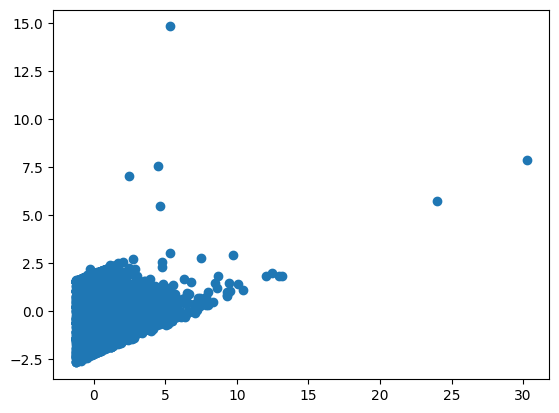

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df['A'],df['B'])

***Q3 & Q4***

In [8]:
def cluster_prediction(x,k,pi,mu,sigma):
  K = [0]*k
  for i in range(k):
    K[i]+= (pi[i] * multivariate_normal.pdf(x, mean=mu[i], cov=sigma[i], allow_singular=True))
  return np.argmax(K)

***K = 2***

In [9]:
pi,mu,sigma = EM(df,K=2,max_iter = 300)
df["K = 2"] = [cluster_prediction(list(df.iloc[i]),2,pi,mu,sigma) for i in range(df.shape[0])]
print("PI values :",pi)
print("Mean values:\n",mu)
print("covaraince matrix:\n",sigma)

PI values : [0.83861614 0.16138386]
Mean values:
 [[-0.25997239  0.06201708]
 [ 1.3509222  -0.32226596]]
covaraince matrix:
 [[[ 0.22286048 -0.02163143]
  [-0.02163143  0.99320158]]

 [[ 2.86213956  0.63154218]
  [ 0.63154218  0.91148599]]]


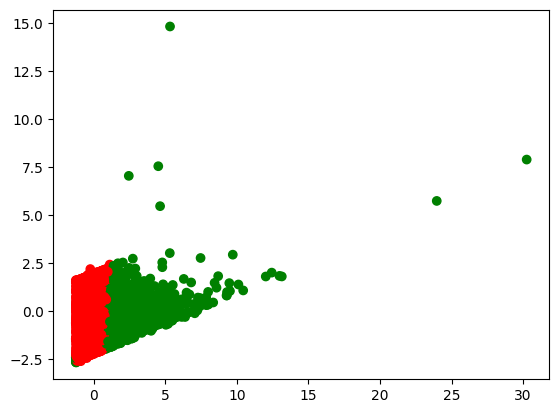

In [10]:
colors = []
for i in range(df.shape[0]):
  if df['K = 2'].iloc[i] == 0:
    colors.append("red")
  else:
    colors.append("green")

plt.scatter(df['A'],df['B'], c= colors);

***K=3***

In [11]:
pi,mu,sigma = EM(df,K=3,max_iter = 300)
df["K = 3"] = [cluster_prediction(list(df.iloc[i]),3,pi,mu,sigma) for i in range(df.shape[0])]
print("PI values :",pi)
print("Mean values:\n",mu)
print("covaraince matrix:\n",sigma)

PI values : [0.08405332 0.88502907 0.03091761]
Mean values:
 [[ 1.42009266 -0.25681302  1.        ]
 [-0.26032848  0.02286032  0.        ]
 [ 3.59131129  0.04379184  1.        ]]
covaraince matrix:
 [[[ 0.17900147  0.0505852   0.        ]
  [ 0.0505852   0.66043207  0.        ]
  [ 0.          0.          0.        ]]

 [[ 0.21897338 -0.01410715  0.        ]
  [-0.01410715  1.00914612  0.        ]
  [ 0.          0.          0.        ]]

 [[ 5.26915389  1.27086297  0.        ]
  [ 1.27086297  1.46516748  0.        ]
  [ 0.          0.          0.        ]]]


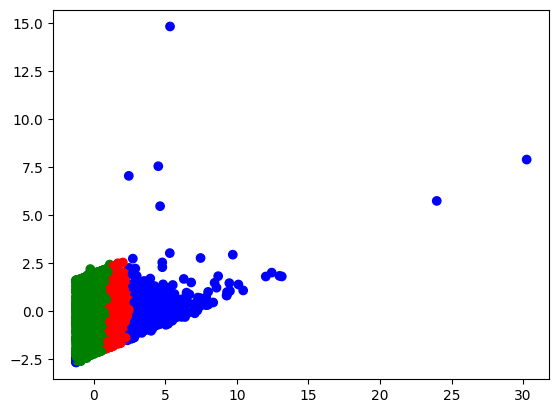

In [12]:
colors = []
for i in range(df.shape[0]):
  if df['K = 3'].iloc[i] == 0:
    colors.append("red")
  elif df['K = 3'].iloc[i] == 1:
    colors.append("green")
  else:
    colors.append("blue")

plt.scatter(df['A'],df['B'], c= colors);

In [13]:
pi,mu,sigma = EM(df,K=4,max_iter = 300)
df["K = 4"] = [cluster_prediction(list(df.iloc[i]),4,pi,mu,sigma) for i in range(df.shape[0])]
print("PI values :",pi)
print("Mean values:\n",mu)
print("covaraince matrix:\n",sigma)

PI values : [0.30237195 0.11497093 0.52768656 0.05497057]
Mean values:
 [[-0.51526486  0.80981338  0.          1.        ]
 [ 2.00396977 -0.17597533  1.          0.44500632]
 [-0.11154139 -0.31019458  0.          1.        ]
 [-0.28629384 -1.10872593  0.          1.        ]]
covaraince matrix:
 [[[0.08916956 0.02279568 0.         0.        ]
  [0.02279568 0.44547297 0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]]

 [[2.47464119 0.50705537 0.         0.90410314]
  [0.50705537 0.89460438 0.         0.12414713]
  [0.         0.         0.         0.        ]
  [0.90410314 0.12414713 0.         0.69198202]]

 [[0.23357415 0.11871057 0.         0.        ]
  [0.11871057 0.83521103 0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]]

 [[0.2221333  0.05778992 0.         0.        ]
  [0.05778992 0.02755956 0.         0.        ]
  [0.         0.         

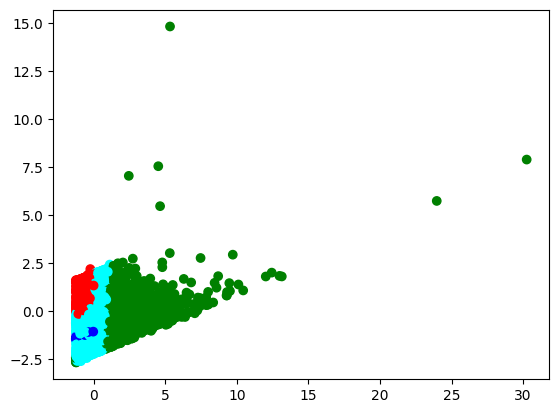

In [14]:
colors = []
for i in range(df.shape[0]):
  if df['K = 4'].iloc[i] == 0:
    colors.append("red")
  elif df['K = 4'].iloc[i] == 1:
    colors.append("green")
  elif df['K = 4'].iloc[i] == 2:
    colors.append("cyan")
  else:
    colors.append('blue')

plt.scatter(df['A'],df['B'], c= colors);

***Q4***

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
for k in [2,3,4]:
  print(f"No of clusters = {k}")
  print("Silhoutter score is ",silhouette_score(X = df[['A','B']],labels = df[f'K = {k}']))

No of clusters = 2
Silhoutter score is  0.45548719509551755
No of clusters = 3
Silhoutter score is  0.33843461112136114
No of clusters = 4
Silhoutter score is  0.09764190684523885
